In [62]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

# import the train test split
from sklearn.model_selection import train_test_split

#Risk-free rate for 1986 - 2016 : 9.34% ( 30-year Treasury Constant Maturity Rate at 1986 )
# Monthly discount rate = 1/1.000248 

price_file = "IL_Corn_Price.csv"
price_df = pd.read_csv(price_file)

weighted_average_df = pd.read_csv("input_model_weighted_average.csv")

In [63]:
len(price_df)

370

In [64]:

# List to store results

#  Stores the name of model
model_name = []

# Get current working directory

# Uses the input file generated from preprocessing
input_file ='input_model_weighted_average.csv'

input_data = pd.read_csv(input_file)

# Making all column names UPPER CASE --> inline with the weather data file
input_data.columns = map(str.upper, input_data.columns)

# drop UNNAMED:0.1
input_data = input_data.drop('UNNAMED: 0', axis=1)

input_data.head()

# List of column names
col_names = list(input_data)

# List all column types
#input_data.dtypes

# Preprocessing

print("Shape of Original data: {}".format(input_data.shape) + "\n")

input_variables = input_data.iloc[:,4:]
print("Variables: " + str(input_variables.columns) + "\n")
print("Shape of variable data: {}".format(input_variables.shape) + "\n")


Shape of Original data: (370, 24)

Variables: Index(['TMP_LOW', 'DP_HIGH', 'DP_AVG', 'DP_LOW', 'HUM_HIGH', 'HUM_AVG',
       'HUM_LOW', 'SEALVL_HIGH', 'SEALVL_AVG', 'SEALVL_LOW', 'VIS_HIGH',
       'VIS_AVG', 'VIS_LOW', 'WIND_HIGH', 'WIND_AVG', 'PRECIP', 'NUMDAY_RAIN',
       'NUM_DAYS_SNOW', 'NUM_DAYS_FOG', 'NUM_DAYS_THNDRSTRM'],
      dtype='object')

Shape of variable data: (370, 20)



In [65]:
price_df

,Year,Period,State,Commodity,Data Item,Value,Discounted_Value
0,1986,JAN,ILLINOIS,CORN,"CORN, GRAIN - PRICE RECEIVED, MEASURED IN $ / BU",2.35,2.350000
1,1986,FEB,ILLINOIS,CORN,"CORN, GRAIN - PRICE RECEIVED, MEASURED IN $ / BU",2.38,2.379410
2,1986,MAR,ILLINOIS,CORN,"CORN, GRAIN - PRICE RECEIVED, MEASURED IN $ / BU",2.35,2.348835
3,1986,APR,ILLINOIS,CORN,"CORN, GRAIN - PRICE RECEIVED, MEASURED IN $ / BU",2.34,2.338259
4,1986,MAY,ILLINOIS,CORN,"CORN, GRAIN - PRICE RECEIVED, MEASURED IN $ / BU",2.45,2.447570
5,1986,JUN,ILLINOIS,CORN,"CORN, GRAIN - PRICE RECEIVED, MEASURED IN $ / BU",2.45,2.446963
6,1986,JUL,ILLINOIS,CORN,"CORN, GRAIN - PRICE RECEIVED, MEASURED IN $ / BU",2.04,2.036966
7,1986,AUG,ILLINOIS,CORN,"CORN, GRAIN - PRICE RECEIVED, MEASURED IN $ / BU",1.77,1.766930
8,1986,SEP,ILLINOIS,CORN,"CORN, GRAIN - PRICE RECEIVED, MEASURED IN $ / BU",1.52,1.516987
9,1986,OCT,ILLINOIS,CORN,"CORN, GRAIN - PRICE RECEIVED, MEASURED IN $ / BU",1.39,1.386901


In [66]:

price = price_df.iloc[:,5]
discounted_price = price_df.iloc[:,6]

from sklearn.linear_model import LinearRegression
no_of_trials = 200

model_results = []
model_name = []
model_scores = []
for i in range(no_of_trials):
    X_train, X_test, y_train, y_test = train_test_split(input_variables.iloc[:,2:23], price, test_size=0.2)

    # Fit a linear regression model
    lr = LinearRegression().fit(X_train, y_train)
    # Store Result and Model Name
    model_scores.append(lr.score(X_test,y_test))

model_results.append(sum(model_scores)/no_of_trials)
model_name.append("Price")

model_scores = []
for i in range(no_of_trials):
    X_train, X_test, y_train, y_test = train_test_split(input_variables.iloc[:,2:23], discounted_price, test_size=0.2)

    # Fit a linear regression model
    lr = LinearRegression().fit(X_train, y_train)
    # Store Result and Model Name
    model_scores.append(lr.score(X_test,y_test))

model_results.append(sum(model_scores)/no_of_trials)
model_name.append("Price_discounted")



In [67]:
model_results

[0.3146389741342514, 0.29648125043075402]

In [68]:
model_name

['Price', 'Price_discounted']

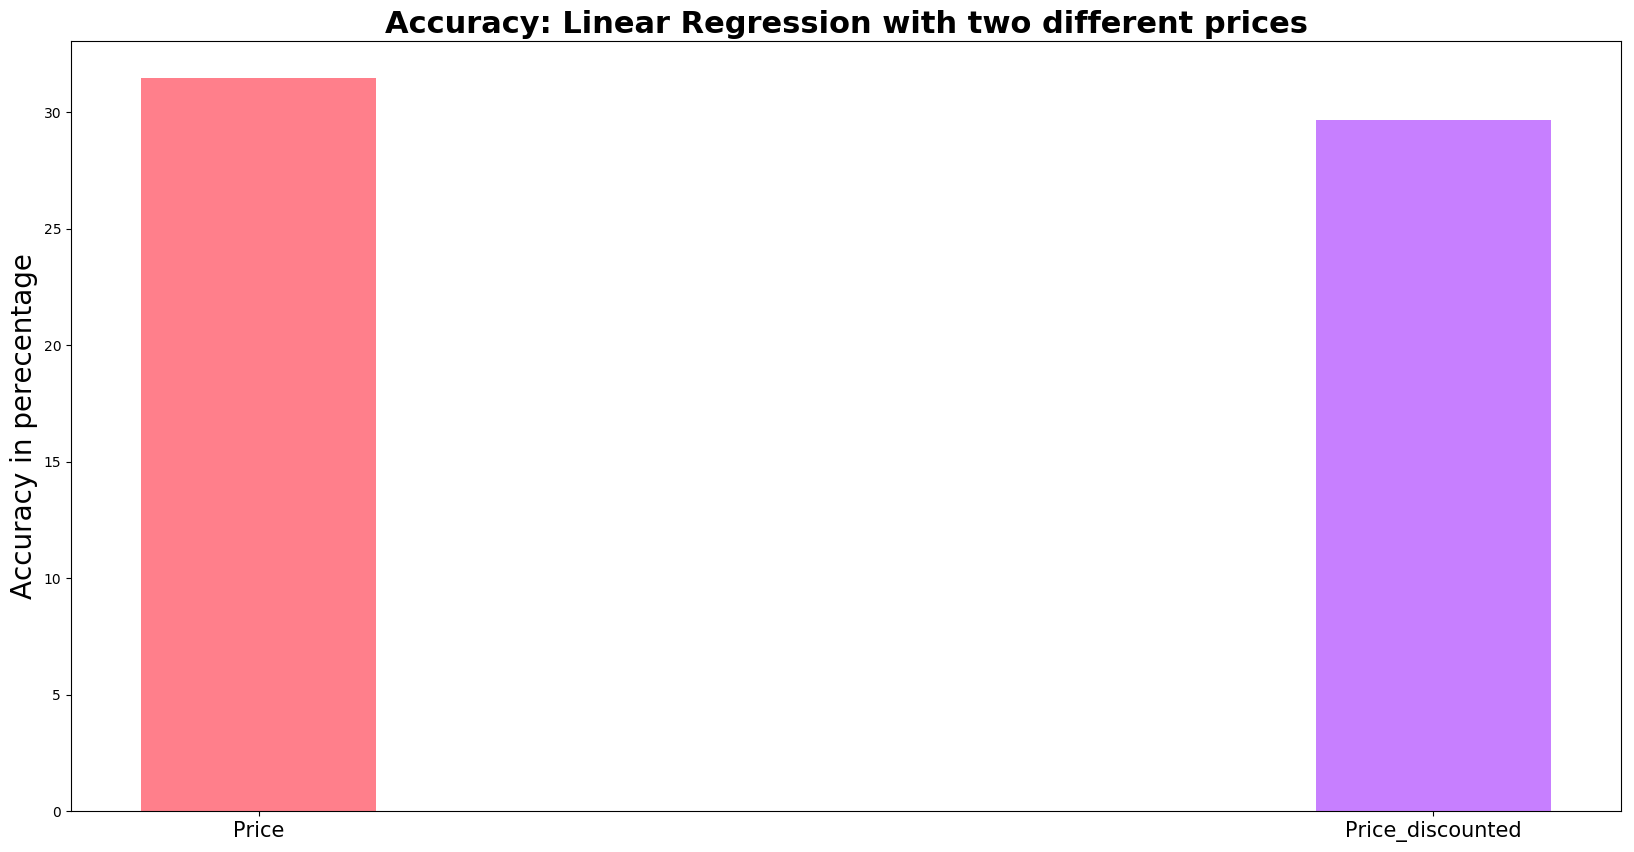

In [69]:
from matplotlib import cm
import random

# Give each bar separate color
color_code_vector = random.sample(range(1, 100), len(model_name))
reg_color_code_vector = map(lambda x: x/max(color_code_vector), color_code_vector)
reg_color_code_vector = list(reg_color_code_vector)
reg_color_code_vector
colors = cm.hsv(reg_color_code_vector)

# Expressing accuracy in percentage
model_results_percentage = list(map(lambda x: x*100, model_results))

y_pos = np.arange(len(model_name))

plt.rcdefaults() # white background, gets rid of gray
plt.figure(figsize = (20,10))
plt.bar(y_pos, model_results_percentage, align='center', alpha=0.5, width=0.2, color = colors)
plt.xticks(y_pos, model_name, fontsize = 15)
plt.ylabel('Accuracy in perecentage', fontsize=20)
plt.title('Accuracy: Linear Regression with two different prices', fontsize=22, fontweight='bold')
plt.show()

In [121]:
index_name = []
for i in range(13):
    index_name.append("+" + str(i) + " Months")
accuracy_df = pd.DataFrame(0,index = index_name, columns = ["Price", "Price_discounted"])
accuracy_df

,Price,Price_discounted
+0 Months,0,0
+1 Months,0,0
+2 Months,0,0
+3 Months,0,0
+4 Months,0,0
+5 Months,0,0
+6 Months,0,0
+7 Months,0,0
+8 Months,0,0
+9 Months,0,0


In [111]:
def lr_model_test(price_data, weather_data, time_lag):
    
    price_drop_range = []
    weather_drop_range = []
    for i in range(time_lag):
        price_drop_range.append(i)
        weather_drop_range.append((-1)*(i + 1))
    
    
    temp_price = price_data.drop(price_df.index[price_drop_range])
    temp_weather = weather_data.drop(weather_data.index[weather_drop_range])
    
    price = temp_price.iloc[:,5]
    discounted_price = temp_price.iloc[:,6]
    
    results = []
    model_scores = []
    for i in range(no_of_trials):
        X_train, X_test, y_train, y_test = train_test_split(temp_weather.iloc[:,2:23], price, test_size=0.2)

        # Fit a linear regression model
        lr = LinearRegression().fit(X_train, y_train)
        # Store Result and Model Name
        model_scores.append(lr.score(X_test,y_test))

    results.append(sum(model_scores)/no_of_trials)

    model_scores = []
    for i in range(no_of_trials):
        X_train, X_test, y_train, y_test = train_test_split(temp_weather.iloc[:,2:23], discounted_price, test_size=0.2)

        # Fit a linear regression model
        lr = LinearRegression().fit(X_train, y_train)
        # Store Result and Model Name
        model_scores.append(lr.score(X_test,y_test))

    results.append(sum(model_scores)/no_of_trials)
    
    return results


In [131]:
no_of_trials = 50
for i in range(13):
    scores = lr_model_test(price_df, input_data, i)
    accuracy_df["Price"].iloc[i] = scores[0]
    accuracy_df["Price_discounted"].iloc[i] = scores[1]

print(accuracy_df)


               Price  Price_discounted
+0 Months   0.298991          0.272439
+1 Months   0.331703          0.288583
+2 Months   0.335325          0.317255
+3 Months   0.339288          0.318083
+4 Months   0.344269          0.300476
+5 Months   0.328521          0.287302
+6 Months   0.335507          0.321962
+7 Months   0.322742          0.281601
+8 Months   0.316692          0.292216
+9 Months   0.330002          0.315954
+10 Months  0.320389          0.307382
+11 Months  0.312225          0.277751
+12 Months  0.313094          0.282686


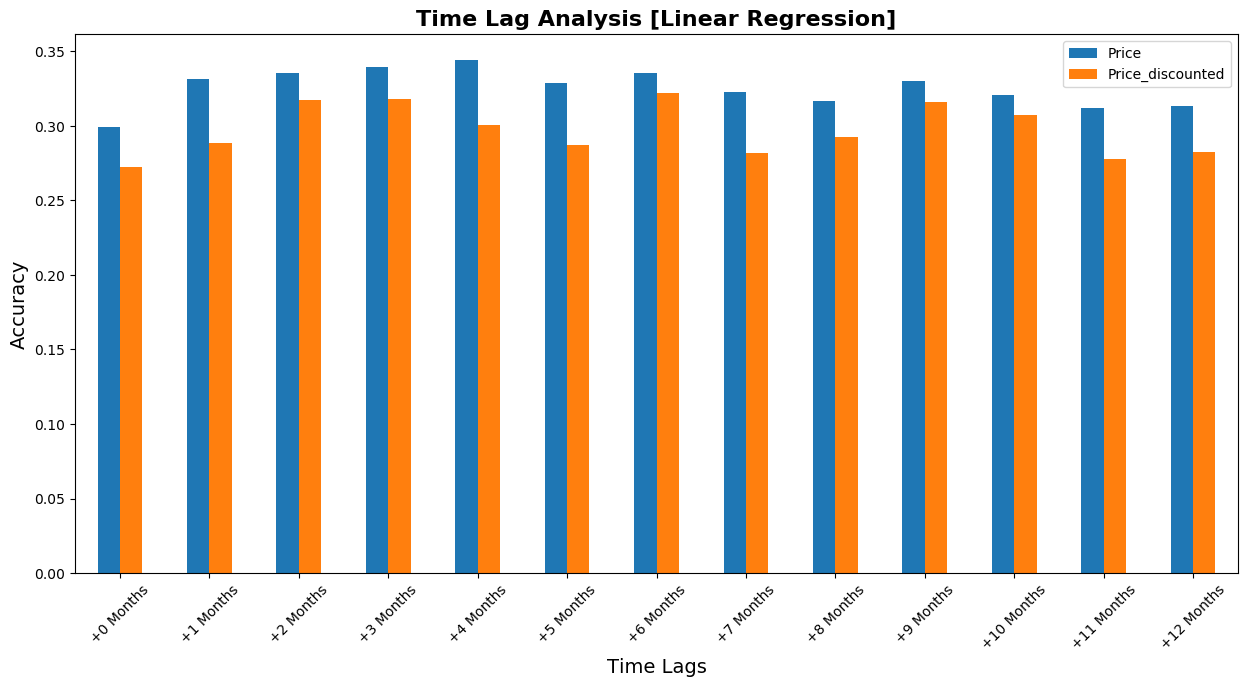

In [132]:
graph = accuracy_df.plot(kind='bar', figsize=(15, 7))
graph.set_title("Time Lag Analysis [Linear Regression]", fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Time Lags', fontsize=14)
plt.legend()
plt.show()

,Year,Period,State,Commodity,Data Item,Value,Discounted_Value
365,2016,AUG,ILLINOIS,CORN,"CORN, GRAIN - PRICE RECEIVED, MEASURED IN $ / BU",3.17,2.894184
366,2016,SEP,ILLINOIS,CORN,"CORN, GRAIN - PRICE RECEIVED, MEASURED IN $ / BU",3.27,2.984743
367,2016,OCT,ILLINOIS,CORN,"CORN, GRAIN - PRICE RECEIVED, MEASURED IN $ / BU",3.30,3.011379
368,2016,NOV,ILLINOIS,CORN,"CORN, GRAIN - PRICE RECEIVED, MEASURED IN $ / BU",3.32,3.028878
369,2016,DEC,ILLINOIS,CORN,"CORN, GRAIN - PRICE RECEIVED, MEASURED IN $ / BU",3.47,3.164940


In [133]:

from sklearn.linear_model import Ridge
def Ridge_0_1_model_test(price_data, weather_data, time_lag):
    
    price_drop_range = []
    weather_drop_range = []
    for i in range(time_lag):
        price_drop_range.append(i)
        weather_drop_range.append((-1)*(i + 1))
    
    
    temp_price = price_data.drop(price_df.index[price_drop_range])
    temp_weather = weather_data.drop(weather_data.index[weather_drop_range])
    
    price = temp_price.iloc[:,5]
    discounted_price = temp_price.iloc[:,6]
    
    results = []
    model_scores = []
    for i in range(no_of_trials):
        X_train, X_test, y_train, y_test = train_test_split(temp_weather.iloc[:,2:23], price, test_size=0.2)

        # Fit a linear regression model
        ridge = Ridge().fit(X_train, y_train)
        # Store Result and Model Name
        model_scores.append(ridge.score(X_test,y_test))

    results.append(sum(model_scores)/no_of_trials)

    model_scores = []
    for i in range(no_of_trials):
        X_train, X_test, y_train, y_test = train_test_split(temp_weather.iloc[:,2:23], discounted_price, test_size=0.2)

        # Fit a linear regression model
        ridge = Ridge().fit(X_train, y_train)
        # Store Result and Model Name
        model_scores.append(ridge.score(X_test,y_test))

    results.append(sum(model_scores)/no_of_trials)
    
    return results


In [137]:
no_of_trials = 40
for i in range(13):
    scores = Ridge_0_1_model_test(price_df, input_data, i)
    accuracy_df["Price"].iloc[i] = scores[0]
    accuracy_df["Price_discounted"].iloc[i] = scores[1]

print(accuracy_df)


               Price  Price_discounted
+0 Months   0.300828          0.296437
+1 Months   0.331618          0.291771
+2 Months   0.340689          0.320223
+3 Months   0.329684          0.311137
+4 Months   0.347046          0.316145
+5 Months   0.322142          0.302862
+6 Months   0.351029          0.310170
+7 Months   0.326497          0.318496
+8 Months   0.323149          0.249614
+9 Months   0.319047          0.311672
+10 Months  0.348175          0.302492
+11 Months  0.330885          0.307287
+12 Months  0.314299          0.280967


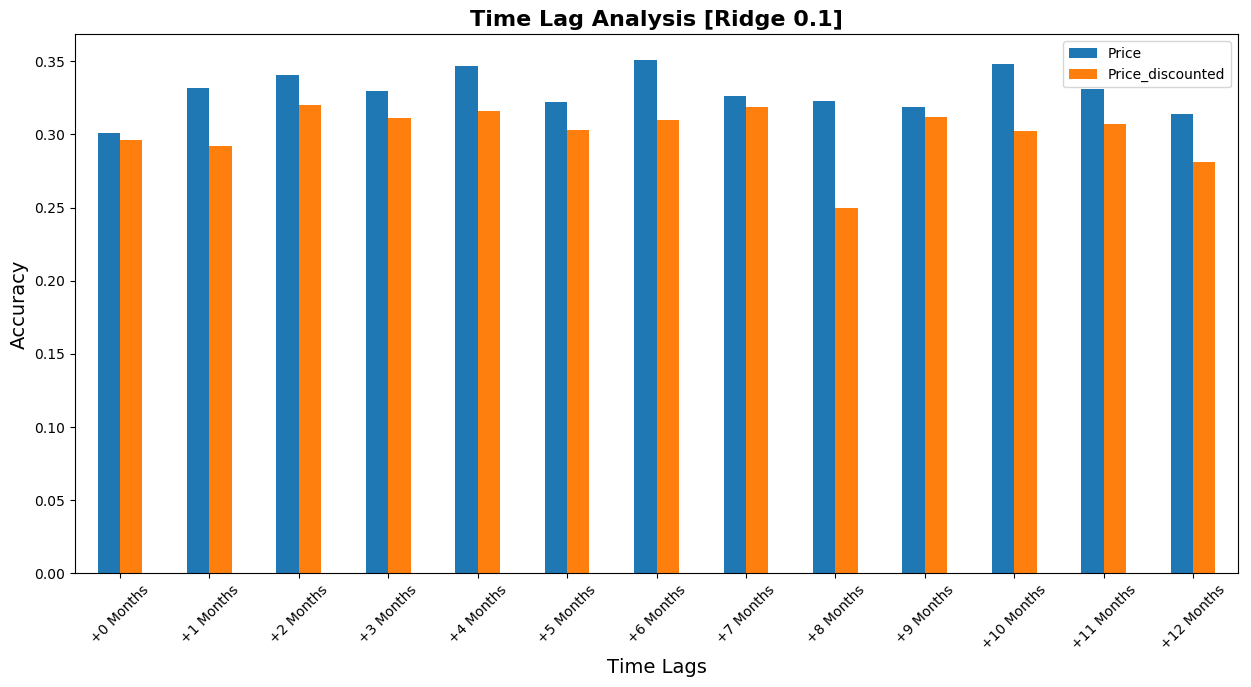

In [138]:
graph = accuracy_df.plot(kind='bar', figsize=(15, 7))
graph.set_title("Time Lag Analysis [Ridge 0.1]", fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Time Lags', fontsize=14)
plt.legend()
plt.show()